<CENTER>
</br>
<p><font size="5"> TAR: Taller de Aprendizaje por Refuerzo 2025</span></p>
<p><font size="5">  LAB 1: MDP</font></p>
</p></br>
</p>
</CENTER>


----------------------------

In this lab we are going to go through the fundamental concepts of MDP, state and solve a problem for optimal machine replacement, relying on the algorithms seen in class, and no particular MDP python library other than regular ones such as numpy, random, matplotlib.

## Machine replacement

A machine has possible states in $\{1,\ldots,S\}$ that represent how good it performs (the higher the better), state 1 can be consider as broken, state S as new. At each instant $k=0,\ldots$ either the machine is replaced (action $a=1$) or it is left unchanged (action $a=2$). We assume that

\begin{equation}
\begin{array}{ll}
P(s_{k+1}=S|a_k=1) &=1\\
P(s_{k+1}=s|s_k=s\_ ,a_k=2) &=(1-\theta)\delta_{s\_ ,s}+\theta \delta_{\max(1,s\_-1 ),s}.
\end{array}
\end{equation}

where $\delta_{a,b}=1$ if $a=b$ and $0$ otherwise.

**1)** Explain the meaning of these probabilities.

**2)** Give the expression of transition matrices $P(1)$ and $P(2)$ corresponding to actions $a_k=1$ and $a_k=2$.

At times $k=0,\ldots$, the cost of machine replacement is $c_k(s,a=1)=C$, while if the machine is not replaced, there is still a cost given by $c_k(s,a=2)=(S-s)/(S-1)$, due to the loss of quantity/quality of the production of the machine when its state degrades.

**3)** Implement the trajectory of the MDP for a given policy $\pi$ in a function *trajectory(pi=$\pi$)* that outputs the trajectory of the state $s$, the trajectory of the action $a$ and resulting cumulative cost $J$.

**4)** Implement a plotting function  *plot_trajectory(pi=$\pi$,policy='')* that runs the *trajectory* function for policy $\pi$ and plots the trajectories of $s$ and $a$ and gives the value of cumulative cost $J$. The policy string represents the legend in the plot.

**5)** Express Bellman's value iteration algorithm. Implement the algorithm for $S=100$, $\theta=.5$, $C=100$ and discount factor $\gamma$ as a parameter.  

**6)** For the optimal policy, plot a few trajectories of the MDP. Test the influence of parameters $\theta$, $C$, $\gamma$... Comments?

6a) Test for a small γ (the future is very little taken into account) and different values of C. Describe the policy obtained for a small cost and for a large cost. Consider small θs (degradation is very fast) and large θ (degradation is slow) What can you observe? Is the obtained policy consistent with your intuition?

6b) Test for a large γ<1 (the future is taken into account to a large extent) and different values of C. Describe the policy obtained for a small cost and for a large cost. Consider again small θ (degradation is very fast) and large θ (degradation is slow) What can you observe? Is the obtained policy consistent with your intuition? What can you say with respect to 6a?

------------

In [1]:
from graphviz import Digraph
import numpy as np
import matplotlib.pyplot as plt

**Respuesta 1:**

\begin{equation}
\begin{array}{ll}
P(s_{k+1}=S|a_k=1) &=1\\
P(s_{k+1}=s|s_k=s\_ ,a_k=2) &=(1-\theta)\delta_{s\_ ,s}+\theta \delta_{\max(1,s\_-1 ),s}
\end{array}
\end{equation}

Dado un estado actual $s_k=s_{-}$.

* Si se reemplaza la máquina ($a_k=1$), la máquina queda como nueva ($s=S$) con probabilidad 1.

* Si no se reemplaza la máquina ($a_k=2$):

    * Si $s=s_{-}$, $s_{-}\ne 1$ y $s_{-}-1\ge1$, entonces $s \ne max(1,s_{-}-1)$ y $\delta_{max(1,s_{-}-1),s}=0$
    * Si $s=s_{-}=1$ y $s_{-}-1\le1$, entonces $max(1,s_{-}-1)=1$ y $\delta_{max(1,s_{-}-1),s}=1$
    * Si $s=s_{-}-1$, $s_{-}\ne 1$ y $s_{-}-1\ge 1$, entonces  $\delta_{max(1,s_{-}-1),s}=1$ y $\delta_{s{-},s}=0$

Esto quiere decir que:

* Si no se reemplaza la máquina, con probabilidad $1-\theta$, el estado permanece igual si no era estado 1. Si estado actual es 1, entonces con probabilidad 1 permanece igual.
* Si no se reemplaza la máquina y el estado actual no es 1, con probabilidad $\theta$, el estado se degrada en uno.

---

**Respuesta 2:**

En las siguientes celdas se pueden ver los diagramas de estados para los casos de acciones $a_k=1$ y $a_k=2$ tomando como ejemplo $S=5$ y $\theta=0.5$.

A partir de los diagramas de estados se puede deducir las matrices de transiciones.

\begin{equation}
    P(1)_{ij}=
    \begin{cases}
      1, & \text{si}\ j=S \\
      0, & \text{en otro caso}
    \end{cases}
\end{equation}

\begin{equation}
    P(2)_{ij}=
    \begin{cases}
      1-\theta, & \text{si}\ j=i, i\ge2 \\
      \theta, & \text{si} j=i-1, i\ge2 \\
      1, & \text{si} j=i=1 \\
      0, & \text{en otro caso}
    \end{cases}
\end{equation}


---

In [2]:
# pip install graphviz

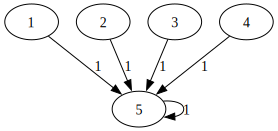

In [3]:
def diagrama_estado_accion_1(S=5):
    dot = Digraph()

    for i in range(1, S+1):
        dot.node(str(i))

    for i in range(1, S+1):
        dot.edge(str(i), str(S), label="1")

    return dot

diagrama_estado_accion_1(S=5)


In [4]:
# dot = diagrama_estado_accion_1()
# dot.render(filename='grafo_a1', format='png', cleanup=True)

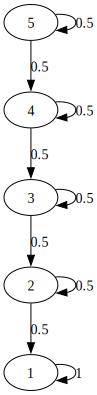

In [5]:
def diagrama_estado_accion_2(S=5, theta=0.5):
    dot = Digraph()

    for i in range(1, S+1):
        dot.node(str(i))

    dot.edge(str(1), str(1), label=f"{1}")

    for i in range(1, S+1):
        
        

        if i > 1:
            dot.edge(str(i), str(i - 1), label=f"{theta}")
            dot.edge(str(i), str(i), label=f"{1 - theta}")

    return dot

diagrama_estado_accion_2(S=5, theta=0.5)

In [6]:
# dot = diagrama_estado_accion_2()
# dot.render(filename='grafo_a2', format='png', cleanup=True)

In [7]:
def politica_deterministica():
    # valores es una matriz de Sx1
    valores = np.ones((5,1))
    # s = 1
    valores[0] = 1 # reemplazo
    # s = 2
    valores[1] = 1 # reemplazo
    # s = 3 
    valores[2] = 2 # no reemplazo
    # s = 4
    valores[3] = 2 # no reemplazo
    # s = 5
    valores[4] = 2 # no reemplazo
    return valores

In [8]:
pi_det = politica_deterministica()
pi_det

array([[1.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [9]:
def politica_estocastica():
    # valores es una matriz de Sx2 que representa la politica estocastica
    valores = np.ones((5,2))
    # s = 1
    valores[0] = [0.9,0.1]
    # s = 2
    valores[1] = [0.8,0.2]
    # s = 3
    valores[2] = [0.7,0.3]
    # s = 4
    valores[3] = [0.6,0.4]
    # s = 5
    valores[4] = [0.5,0.5]
    return valores

In [10]:
pi_est = politica_estocastica()
pi_est

array([[0.9, 0.1],
       [0.8, 0.2],
       [0.7, 0.3],
       [0.6, 0.4],
       [0.5, 0.5]])

In [11]:
def cost(C,a,s,S):
    res = 0
    if a == 1:
        # maquina reemplazada en tiempo k
        res = C
    elif a == 2:
        # maquina no reemplazada en tiempo k
        res = (S-s)/(S-1)
    return res

**Respuesta 3:**

In [12]:
def trajectory(pasos, C, pi, theta, estado_inicial, semilla=None):
    
    if semilla is not None:
        np.random.seed(semilla)
        
    S = pi.shape[0]
    estados = np.zeros(pasos+1, dtype=int) + estado_inicial - 1 # los estados reales serán los valores de estados + 1 y arrancamos por estado_inicial
    acciones = np.ones(pasos, dtype=int)
    J = 0
        
    # chequear si la politica es deterministica o estocastica
    if len(pi.shape) == 1 or pi.shape[1] == 1:
        # politica deterministica
        for paso in range(pasos):
            estado_actual = estados[paso]
            siguiente_accion = pi[estado_actual] # puede ser 1 o 2
            if siguiente_accion == 1:
                # se reemplaza la máquina
                siguiente_estado = S-1
            elif siguiente_accion == 2:
                # no se reemplaza la máquina
                if estado_actual == 0: 
                    # estado 1 en realidad (estado roto)
                    siguiente_estado = 0
                else:
                    siguiente_estado = estado_actual - np.random.binomial(1,theta)
            estados[paso+1] = siguiente_estado
            acciones[paso] = siguiente_accion
            J += cost(C,siguiente_accion,siguiente_estado+1,S)
    elif pi.shape[1] == 2:
        # politica estocastica
        for paso in range(pasos-1):
            estado_actual = estados[paso]
            # Con esa fila sorteo la siguiente acción dada por la política
            siguiente_accion = np.random.choice([1,2], p=pi[estado_actual,:])
            if siguiente_accion == 1:
                # se reemplaza la máquina
                siguiente_estado = S-1
            elif siguiente_accion == 2:
                # no se reemplaza la máquina
                if estado_actual == 0: 
                    # estado 1 en realidad (estado roto)
                    siguiente_estado = 0
                else:
                    siguiente_estado = estado_actual - np.random.binomial(1,theta)
            estados[paso+1] = siguiente_estado
            acciones[paso] = siguiente_accion
            J += cost(C,siguiente_accion,siguiente_estado+1,S)
    return estados, acciones, J

In [13]:
pasos = 100
C = 2
pi = pi_est
theta = 0.3
estado_inicial = 3
semilla = 42

In [14]:
trayectoria_estados, trayectoria_acciones, costo_acumulado = trajectory(pasos,C,pi,theta,estado_inicial,semilla)

In [15]:
trayectoria_estados = trayectoria_estados + 1
trayectoria_estados

array([3, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 4, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 2, 5, 5, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 4, 5, 3])

In [16]:
trayectoria_acciones

array([1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1])

In [17]:
costo_acumulado

np.float64(118.5)

In [18]:
def trajectory_pi_reemplaza_solo_roto(pasos, C, S, theta, estado_inicial, semilla=None):
    
    if semilla is not None:
        np.random.seed(semilla)

    pi = np.ones((S,1)) + 1
    pi[0,0] = 1

    estados = np.zeros(pasos, dtype=int) + estado_inicial - 1 # los estados reales serán los valores de estados + 1 y arrancamos por estado_inicial
    acciones = np.ones(pasos, dtype=int); acciones[0] = 2
    J = cost(C,acciones[0],estados[0],S)
    
    for paso in range(pasos-1):
        estado_actual = estados[paso]
        siguiente_accion = pi[estado_actual,0] # puede ser 1 o 2
        if siguiente_accion == 1:
            # se reemplaza la máquina
            siguiente_estado = S-1
        elif siguiente_accion == 2:
            # no se reemplaza la máquina
            if estado_actual == 0: 
                # estado 1 en realidad (estado roto)
                siguiente_estado = 0
            else:
                siguiente_estado = estado_actual - np.random.binomial(1,theta)
        estados[paso+1] = siguiente_estado
        acciones[paso+1] = siguiente_accion
        J += cost(C,siguiente_accion,siguiente_estado+1,S)
    return estados, acciones, J

In [19]:
pasos = 100
C = 2
S = 100
theta = 0.5
estado_inicial = 80
semilla = 42

In [20]:
trayectoria_estados, trayectoria_acciones, costo_acumulado = trajectory_pi_reemplaza_solo_roto(pasos, C, S, theta, estado_inicial, semilla)

In [21]:
trayectoria_estados = trayectoria_estados + 1
trayectoria_estados

array([80, 80, 79, 78, 77, 77, 77, 77, 76, 75, 74, 74, 73, 72, 72, 72, 72,
       72, 71, 71, 71, 70, 70, 70, 70, 70, 69, 69, 68, 67, 67, 66, 66, 66,
       65, 64, 63, 63, 63, 62, 62, 62, 62, 62, 61, 61, 60, 60, 59, 58, 58,
       57, 56, 55, 54, 53, 52, 52, 52, 52, 52, 52, 52, 51, 51, 51, 50, 50,
       49, 49, 48, 47, 47, 47, 46, 45, 44, 43, 43, 43, 43, 42, 41, 41, 41,
       41, 41, 40, 39, 38, 38, 38, 37, 36, 35, 34, 34, 33, 33, 33])

In [22]:
trayectoria_acciones

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
costo_acumulado

np.float64(43.4040404040404)

**Respuesta 4:**

In [24]:
def plot_trajectory(pi, policy):
    estados, acciones, J = trajectory(pasos, C, pi, theta, estado_inicial, semilla)
    
    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    # Gráfico de estados
    axs[0].step(range(len(estados)), estados, where='post')
    axs[0].set_ylabel("Estado")
    axs[0].set_title(policy)
    axs[0].set_yticks(np.arange(1,S+1,10))
    axs[0].grid(True)

    # Gráfico de acciones
    axs[1].step(range(len(acciones)), acciones, where='post', color='orange')
    axs[1].set_xlabel("Paso")
    axs[1].set_ylabel("Acción")
    axs[1].set_yticks(sorted(list(set(acciones))))
    axs[1].grid(True)

    # Ajuste general
    plt.xticks(np.arange(0, len(estados), 5))
    plt.tight_layout()
    plt.show()
    print("El costo acumulado es: ", J)


In [25]:
# CASO DETERMINISTICO
pasos = 100
C = 2
S = 5
pi = np.ones((S,1)) + 1; pi[0,0] = 1
policy = "Trayectoria de los estados y acciones caso determinístico"
theta = 0.5
estado_inicial = S
semilla = 42

C:\Users\flopa\AppData\Local\Temp\ipykernel_16748\779895038.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  acciones[paso] = siguiente_accion


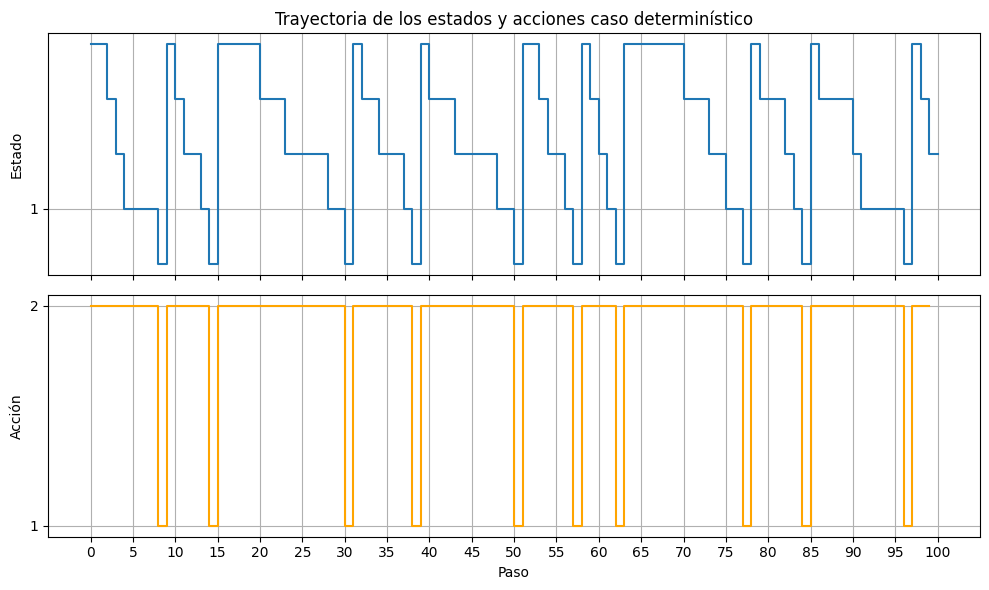

El costo acumulado es:  63.25


In [26]:
plot_trajectory(pi,policy)

In [27]:
# CASO ESTOCASTICO POLITICA EQUIPROBABLE
pasos = 100
C = 2
S = 5
pi = np.array([[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5],[0.5,0.5]])
policy = "Trayectoria de los estados y acciones caso estocástico política equiprobable"
theta = 0.5
estado_inicial = S
semilla = 42

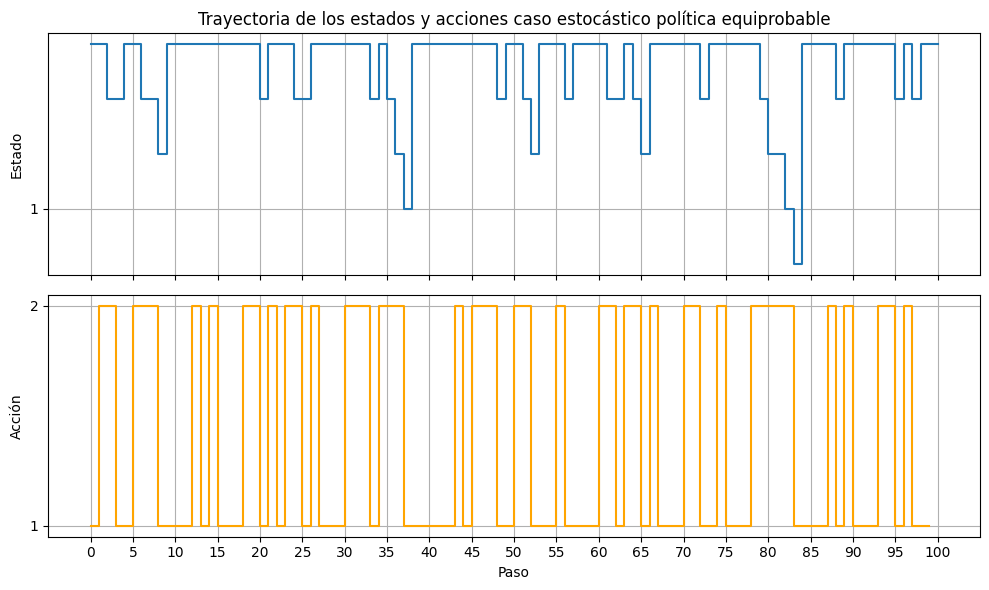

El costo acumulado es:  120.5


In [28]:
plot_trajectory(pi,policy)

In [29]:
# CASO ESTOCASTICO POLITICA QUE REEMPLAZA CON MAS PROBABILIDAD CUANTO PEOR ES EL ESTADO
pasos = 100
C = 2
S = 5
pi = np.array([[1.0,0],[0.75,0.25],[0.5,0.5],[0.25,0.75],[0,1.0]])
policy = "Trayectoria de los estados y acciones caso estocástico política que reemplaza con más probabilidad cuanto peor es el estado"
theta = 0.5
estado_inicial = S
semilla = 42

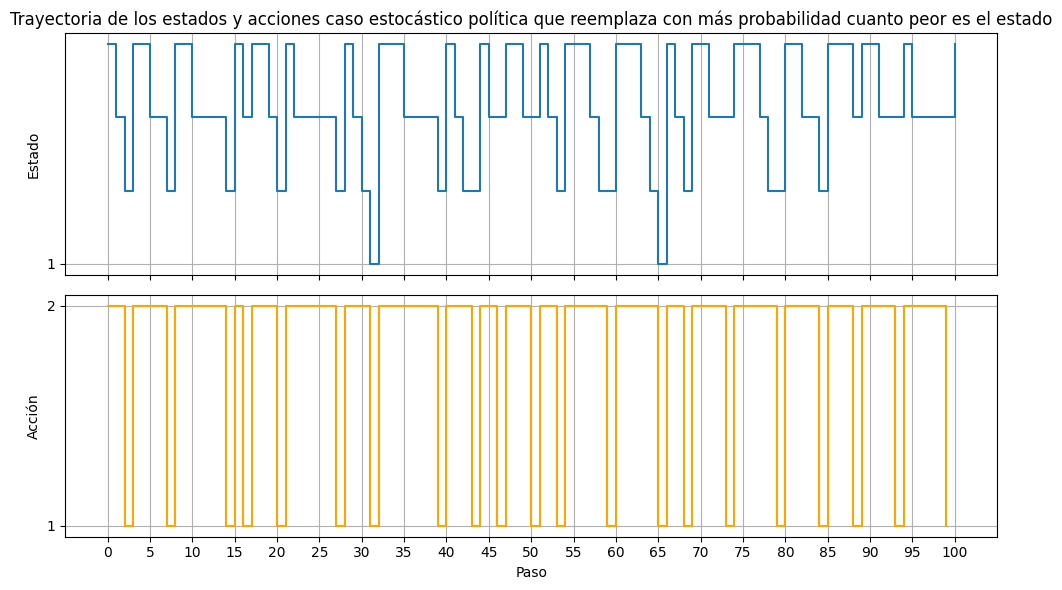

El costo acumulado es:  60.75


In [30]:
plot_trajectory(pi,policy)

**Respuesta 5:**

In [31]:
def matrices_transicion(S,theta):
    # devuelve las matrices de transición
    P = [np.zeros((S,S)), np.zeros((S,S))]

    # matriz de transición para la acción a = 1 (reemplazar)
    for i in range(S):
        P[0][i][S-1] = 1.0

    # matriz de transición para la acción a = 2 (no reemplazar)
    for i in range(S):
        if i >= 1:
            P[1][i][i] = 1 - theta
            P[1][i][i - 1] = theta
        else:
            P[1][i][i] = 1.0  # el estado 0 se queda en 0 con probabilidad 1

    return P

In [32]:
def value_iteration(S, theta, C, gamma, epsilon=1e-5):
    V = np.zeros(S)
    pi = np.zeros(S, dtype=int)

    # Construir matrices de transición P[0] = P(a=1), P[1] = P(a=2)
    P = matrices_transicion(S, theta)
    
    # Definir costos
    c = np.zeros((S, 2))
    for s in range(S):
        c[s,0] = cost(C,1,s+1,S)
        c[s,1] = cost(C,2,s+1,S)
        
    # Iteración de valor
    delta = float('inf')
    # Creo un nuevo array con el mismo tamaño y tipo que V pero inicializado todo con ceros
    V_new = np.zeros_like(V)

    while delta >= epsilon:
        delta = 0
        for s in range(S):
            # Calcular los valores para cada acción
            valores_accion_1 = np.sum(P[0][s]*(c[s,0]+gamma*V))
            valores_accion_2 = np.sum(P[1][s]*(c[s,1]+gamma*V)) 
            # Elegir el mínimo
            V_new[s] = min(valores_accion_1, valores_accion_2)

        # Actualizar V y delta
        delta = np.linalg.norm(V_new - V)
        V = V_new

    # Extraer la política óptima una vez que V converge
    for s in range(S):
        # Usar V y c para obtener la mejor acción
        action_costs = []
        for a in [0, 1]:
            expected_cost = np.sum(P[a][s] * (c[s, a] + gamma * V))
            action_costs.append(expected_cost)
    
        pi[s] = np.argmin(action_costs) + 1

    return V, pi


In [33]:
S = 100
theta = 0.5
C = 100
gammas = [0.0, 0.1, 0.5, 0.9, 0.99]
epsilons = [1e-1, 1e-2, 1e-3, 1e-5]

In [34]:
resultados = {}

for gamma in gammas:
    for epsilon in epsilons:
        V_ast, pi_ast = value_iteration(S,theta,C,gamma,epsilon)
        resultados[(gamma,epsilon)] = {
            "V": V_ast,
            "pi": pi_ast
        }

In [35]:
resultados

{(0.0,
  0.1): {'V': array([1.        , 0.98989899, 0.97979798, 0.96969697, 0.95959596,
         0.94949495, 0.93939394, 0.92929293, 0.91919192, 0.90909091,
         0.8989899 , 0.88888889, 0.87878788, 0.86868687, 0.85858586,
         0.84848485, 0.83838384, 0.82828283, 0.81818182, 0.80808081,
         0.7979798 , 0.78787879, 0.77777778, 0.76767677, 0.75757576,
         0.74747475, 0.73737374, 0.72727273, 0.71717172, 0.70707071,
         0.6969697 , 0.68686869, 0.67676768, 0.66666667, 0.65656566,
         0.64646465, 0.63636364, 0.62626263, 0.61616162, 0.60606061,
         0.5959596 , 0.58585859, 0.57575758, 0.56565657, 0.55555556,
         0.54545455, 0.53535354, 0.52525253, 0.51515152, 0.50505051,
         0.49494949, 0.48484848, 0.47474747, 0.46464646, 0.45454545,
         0.44444444, 0.43434343, 0.42424242, 0.41414141, 0.4040404 ,
         0.39393939, 0.38383838, 0.37373737, 0.36363636, 0.35353535,
         0.34343434, 0.33333333, 0.32323232, 0.31313131, 0.3030303 ,
         0.2929

---

**Comentarios:**

El costo de reemplazo es tan alto que ni siquiera en el estado más deteriorado (estado 1) conviene pagar 100 para tener un estado nuevo. Aunque el sistema se degrade, el modelo prefiere seguir pagando los pequeños costos de funcionamiento antes que hacer un reemplazo tan costoso.

---

**Respuesta 6:**

In [36]:
S = 100

**6a) Test para un γ chico (el futuro importa poco), distintos valores de C y θ**

In [37]:
pasos = 100
estado_inicial = 100
semilla = 42

In [38]:
# el futuro importa poco
gamma = 0.1
# el costo de reemplazar es alto
C = 2
# degradacion rapida
theta = 0.9

Con C = 2, el costo de reemplazar no es tan alto, así que podría pasar que la política reemplace temprano si eso minimiza el costo inmediato.

In [39]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [40]:
V_ast_a, pi_ast_a

(array([1.1       , 1.09879798, 1.08848778, 1.07735784, 1.06615412,
        1.05494377, 1.04373282, 1.03252181, 1.0213108 , 1.01009979,
        0.99888878, 0.98767777, 0.97646676, 0.96525575, 0.95404473,
        0.94283372, 0.93162271, 0.9204117 , 0.90920069, 0.89798968,
        0.88677867, 0.87556766, 0.86435664, 0.85314563, 0.84193462,
        0.83072361, 0.8195126 , 0.80830159, 0.79709058, 0.78587957,
        0.77466855, 0.76345754, 0.75224653, 0.74103552, 0.72982451,
        0.7186135 , 0.70740249, 0.69619148, 0.68498047, 0.67376945,
        0.66255844, 0.65134743, 0.64013642, 0.62892541, 0.6177144 ,
        0.60650339, 0.59529238, 0.58408136, 0.57287035, 0.56165934,
        0.55044833, 0.53923732, 0.52802631, 0.5168153 , 0.50560429,
        0.49439327, 0.48318226, 0.47197125, 0.46076024, 0.44954923,
        0.43833822, 0.42712721, 0.4159162 , 0.40470518, 0.39349417,
        0.38228316, 0.37107215, 0.35986114, 0.34865013, 0.33743912,
        0.32622811, 0.3150171 , 0.30380608, 0.29

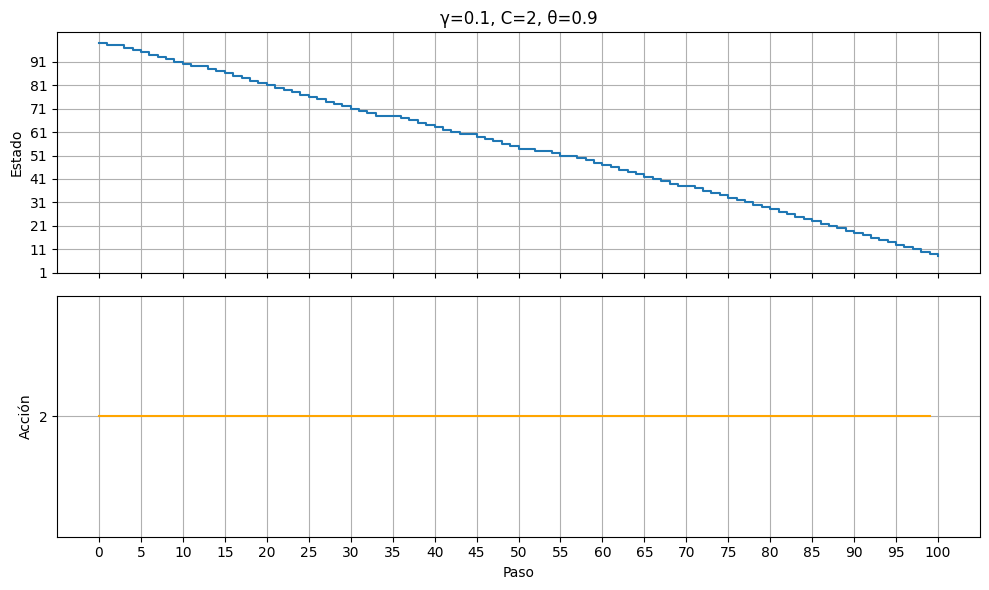

El costo acumulado es:  45.43434343434344


In [41]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [42]:
# el futuro importa poco
gamma = 0.1
# el costo de reemplazar no es tan alto
C = 1
# degradacion rapida
theta = 0.9

In [43]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [44]:
V_ast_a, pi_ast_a

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.9979798 , 0.98759596, 0.97645939, 0.96525508, 0.95404467,
        0.94283372, 0.93162271, 0.9204117 , 0.90920069, 0.89798968,
        0.88677867, 0.87556766, 0.86435664, 0.85314563, 0.84193462,
        0.83072361, 0.8195126 , 0.80830159, 0.79709058, 0.78587957,
        0.77466855, 0.76345754, 0.75224653, 0.74103552, 0.72982451,
        0.7186135 , 0.70740249, 0.69619148, 0.68498047, 0.67376945,
        0.66255844, 0.65134743, 0.64013642, 0.62892541, 0.6177144 ,
        0.60650339, 0.59529238, 0.58408136, 0.57287035, 0.56165934,
        0.55044833, 0.53923732, 0.52802631, 0.5168153 , 0.50560429,
        0.49439327, 0.48318226, 0.47197125, 0.46076024, 0.44954923,
        0.43833822, 0.42712721, 0.4159162 , 0.40470518, 0.39349417,
        0.38228316, 0.37107215, 0.35986114, 0.34865013, 0.33743912,
        0.32622811, 0.3150171 , 0.30380608, 0.29

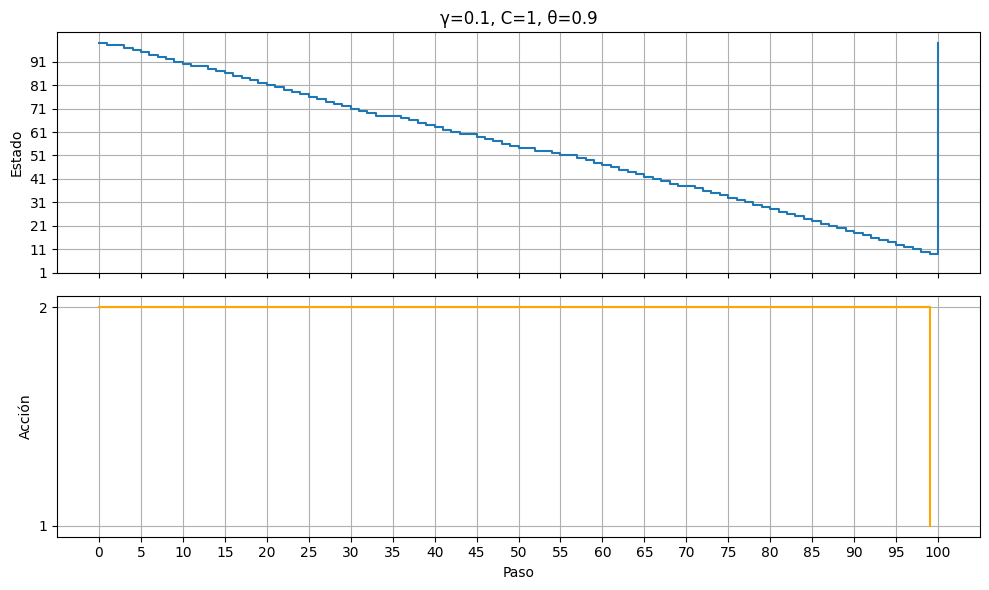

El costo acumulado es:  45.51515151515152


In [45]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [46]:
# el futuro importa poco
gamma = 0.1
# el costo de reemplazar es bajo
C = 0.5
# degradacion rapida
theta = 0.9

In [47]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [48]:
V_ast_a, pi_ast_a

(array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.49388889, 0.48313687, 0.47196717, 0.46075987, 0.4495492 ,
        0.43833822, 0.42712721, 0.4159162 , 0.40470518, 0.39349417,
        0.38228316, 0.37107215, 0.35986114, 0.34865013, 0.33743912,
        0.32622811, 0.3150171 , 0.30380608, 0.29

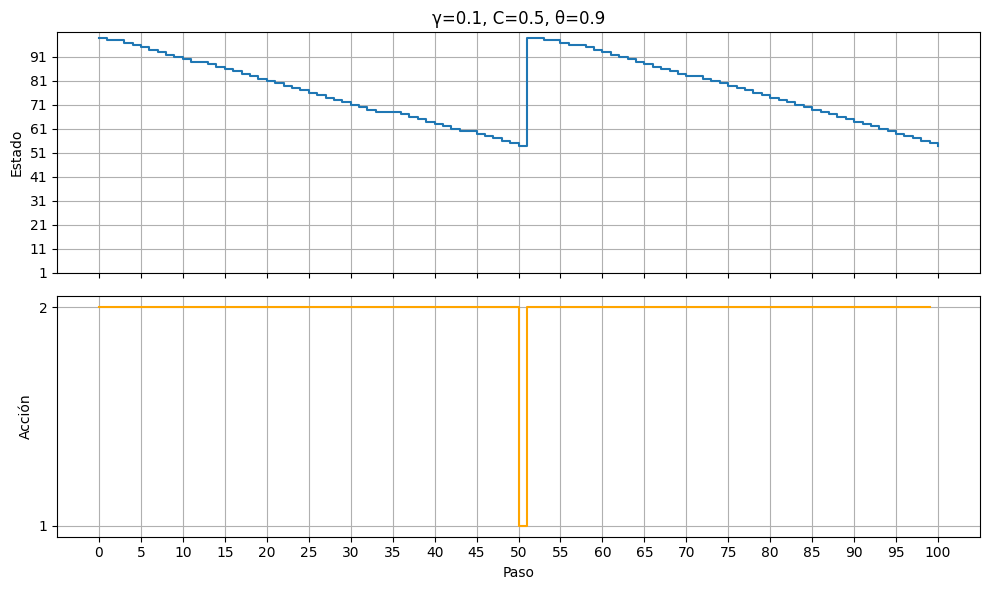

El costo acumulado es:  22.74242424242425


In [49]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [50]:
# el futuro importa poco
gamma = 0.1
# el costo de reemplazar es alto
C = 2
# degradacion lenta
theta = 0.1

In [51]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [52]:
V_ast_a, pi_ast_a

(array([1.10000000e+00, 1.08998990e+00, 1.07887970e+00, 1.06775849e+00,
        1.05663718e+00, 1.04551587e+00, 1.03439455e+00, 1.02327324e+00,
        1.01215192e+00, 1.00103061e+00, 9.89909296e-01, 9.78787982e-01,
        9.67666668e-01, 9.56545354e-01, 9.45424039e-01, 9.34302725e-01,
        9.23181411e-01, 9.12060097e-01, 9.00938783e-01, 8.89817469e-01,
        8.78696154e-01, 8.67574840e-01, 8.56453526e-01, 8.45332212e-01,
        8.34210898e-01, 8.23089584e-01, 8.11968270e-01, 8.00846955e-01,
        7.89725641e-01, 7.78604327e-01, 7.67483013e-01, 7.56361699e-01,
        7.45240385e-01, 7.34119071e-01, 7.22997756e-01, 7.11876442e-01,
        7.00755128e-01, 6.89633814e-01, 6.78512500e-01, 6.67391186e-01,
        6.56269871e-01, 6.45148557e-01, 6.34027243e-01, 6.22905929e-01,
        6.11784615e-01, 6.00663301e-01, 5.89541987e-01, 5.78420672e-01,
        5.67299358e-01, 5.56178044e-01, 5.45056730e-01, 5.33935416e-01,
        5.22814102e-01, 5.11692787e-01, 5.00571473e-01, 4.894501

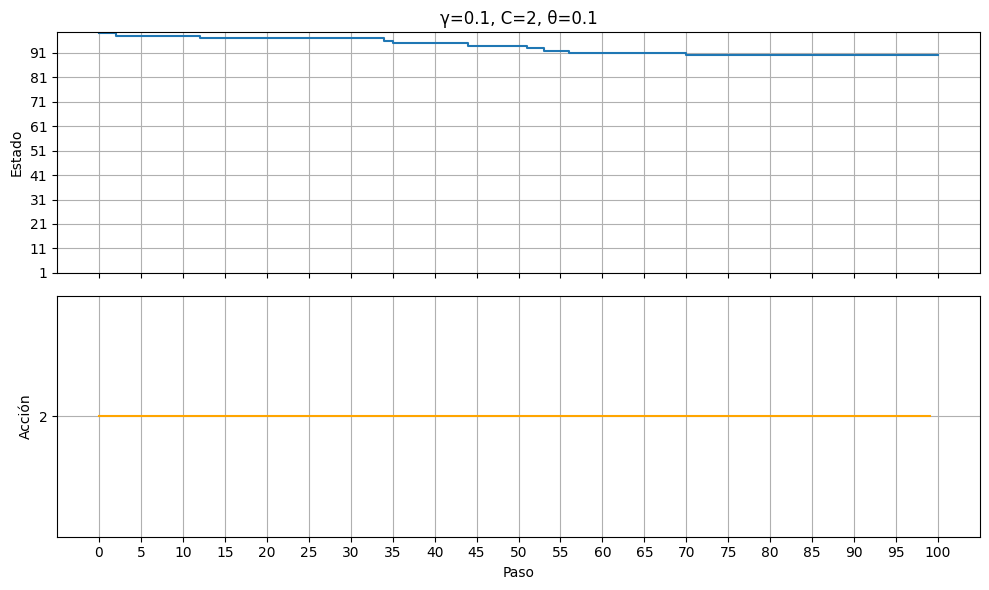

El costo acumulado es:  5.575757575757575


In [53]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [54]:
# el futuro importa poco
gamma = 0.1
# el costo de reemplazar no es tan alto
C = 1
# degradacion lenta
theta = 0.1

In [55]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [56]:
V_ast_a, pi_ast_a

(array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 9.89898990e-01, 9.78787879e-01,
        9.67666667e-01, 9.56545354e-01, 9.45424039e-01, 9.34302725e-01,
        9.23181411e-01, 9.12060097e-01, 9.00938783e-01, 8.89817469e-01,
        8.78696154e-01, 8.67574840e-01, 8.56453526e-01, 8.45332212e-01,
        8.34210898e-01, 8.23089584e-01, 8.11968270e-01, 8.00846955e-01,
        7.89725641e-01, 7.78604327e-01, 7.67483013e-01, 7.56361699e-01,
        7.45240385e-01, 7.34119071e-01, 7.22997756e-01, 7.11876442e-01,
        7.00755128e-01, 6.89633814e-01, 6.78512500e-01, 6.67391186e-01,
        6.56269871e-01, 6.45148557e-01, 6.34027243e-01, 6.22905929e-01,
        6.11784615e-01, 6.00663301e-01, 5.89541987e-01, 5.78420672e-01,
        5.67299358e-01, 5.56178044e-01, 5.45056730e-01, 5.33935416e-01,
        5.22814102e-01, 5.11692787e-01, 5.00571473e-01, 4.894501

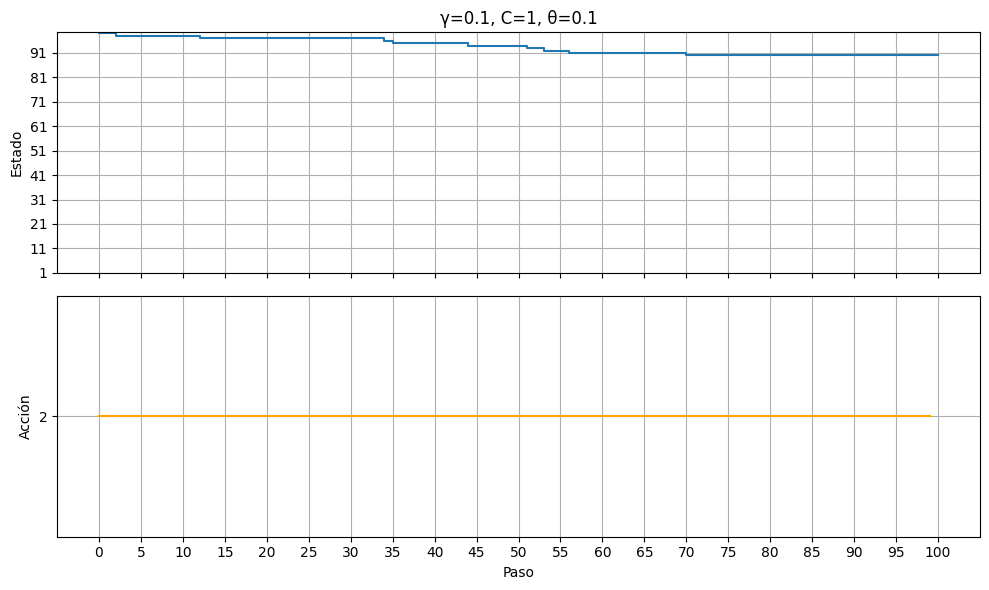

El costo acumulado es:  5.575757575757575


In [57]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [58]:
# el futuro importa poco
gamma = 0.1
# el costo de reemplazar es bajo
C = 0.5
# degradacion lenta
theta = 0.1

In [59]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [60]:
V_ast_a, pi_ast_a

(array([5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 4.894444

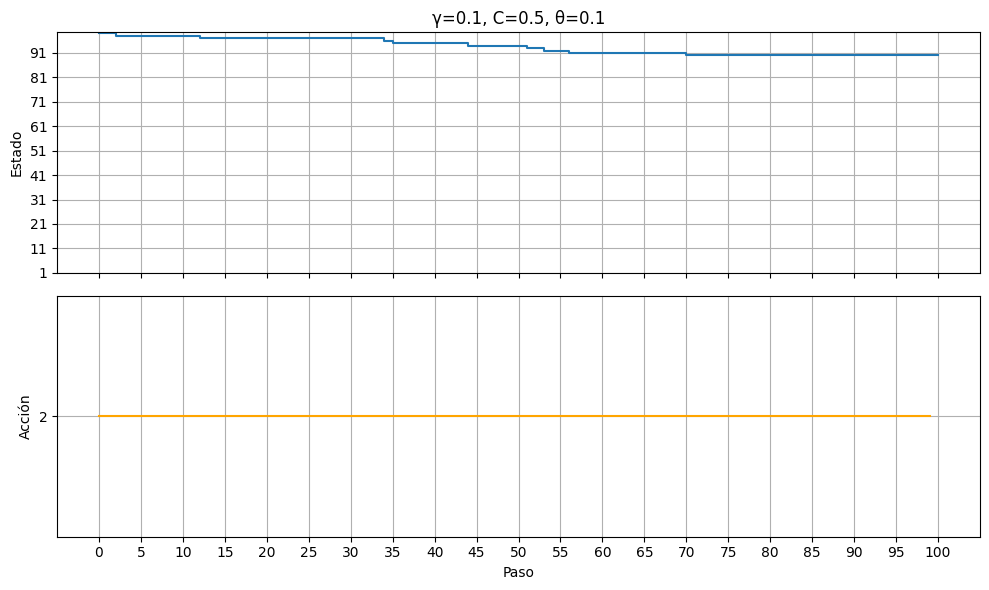

El costo acumulado es:  5.575757575757575


In [61]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

--- 

**Conclusiones:**


La política óptima es no reemplazar nunca para el caso de costo de reemplazo alto (C=2) y degradación rápida (θ=0.9), porque hay mucha probabilidad de degradación (θ cercano a 1) y alto costo de reemplazo.

En cambio, cuando el costo de reemplazo baja a 0.5, se puede observar como la política óptima pasa a ser no reemplazar hasta el estado 55 y después sí (con más deterioro). Cuando C es chico, el costo de reemplazar termina siendo más conveniente en cierto punto que mantener la máquina con un estado bajo.

Cuando la degradación es lenta (θ=0.1), en los 3 casos de costo vistos dio lo mismo porque el costo acumulado fue igual. Esto tiene sentido porque como es tan baja la probabilidad de degradación, se tiene que se degrada poco y entonces no se llega a tener que reemplazar según la política óptima.

Como última observación cabe destacar que como todos estos casos eran con γ chico el futuro no importa mucho y se puede ver que el agente no intenta reemplazar temprano nunca.

---

**6b) Test para un γ grande menor a 1 (el futuro importa mucho), distintos valores de C y θ**

In [62]:
pasos = 100
estado_inicial = 100
semilla = 42

In [63]:
# el futuro importa mucho
gamma = 0.99
# el costo de reemplazar es alto
C = 2
# degradacion rapida
theta = 0.9

In [64]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [65]:
V_ast_a, pi_ast_a

(array([1.99      , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.        , 2.        ,
        2.        , 2.        , 2.        , 2.  

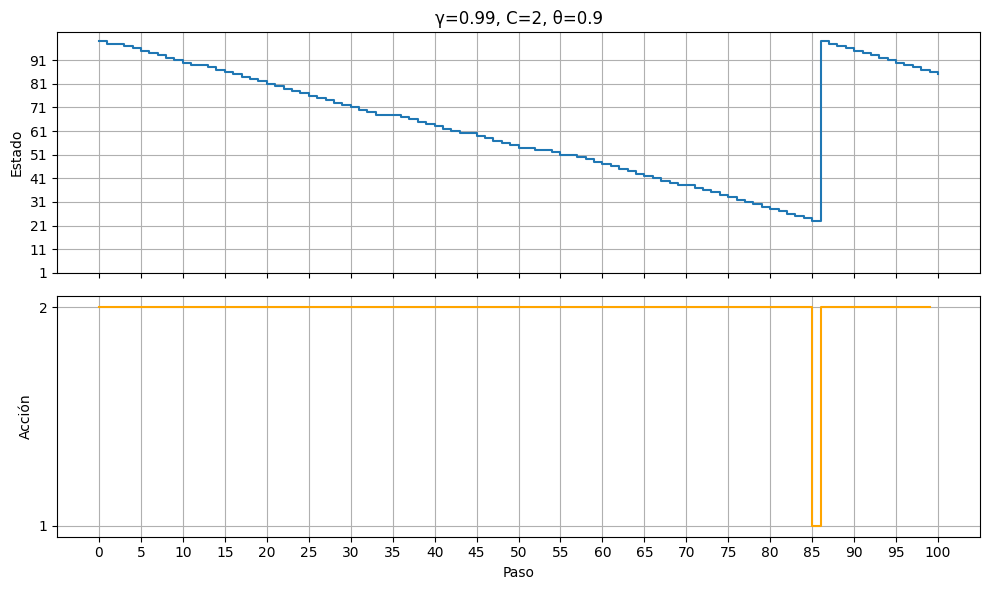

El costo acumulado es:  35.76767676767678


In [66]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [67]:
# el futuro importa mucho
gamma = 0.99
# el costo de reemplazar no es tan alto
C = 1
# degradacion rapida
theta = 0.9

In [68]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [69]:
V_ast_a, pi_ast_a

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  

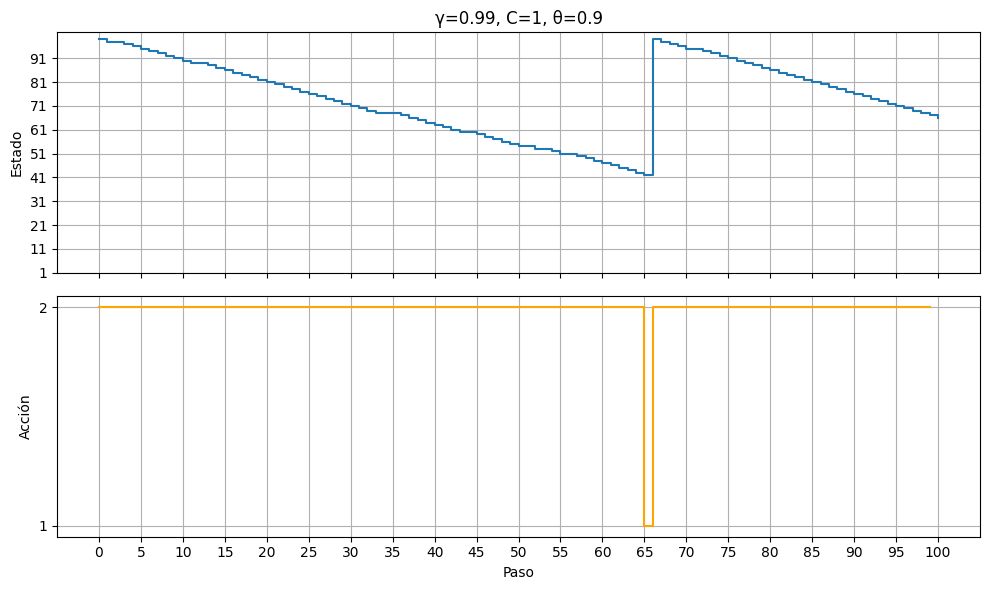

El costo acumulado es:  25.939393939393945


In [70]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [71]:
# el futuro importa mucho
gamma = 0.99
# el costo de reemplazar es bajo
C = 0.5
# degradacion rapida
theta = 0.9

In [72]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [73]:
V_ast_a, pi_ast_a

(array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5 

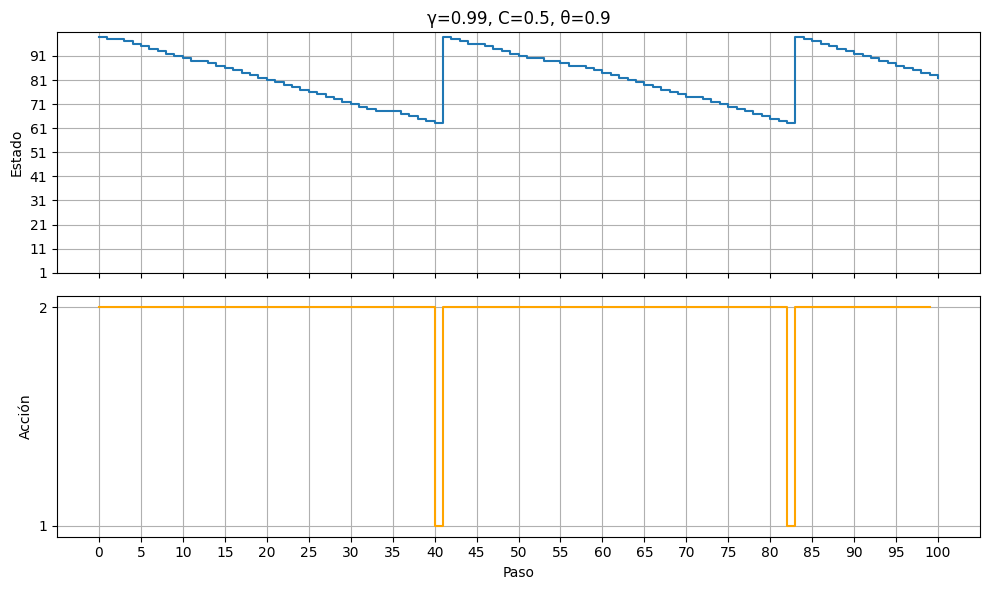

El costo acumulado es:  17.333333333333336


In [74]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [75]:
# el futuro importa mucho
gamma = 0.99
# el costo de reemplazar es alto
C = 2
# degradacion lenta
theta = 0.1

In [76]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [77]:
V_ast_a, pi_ast_a

(array([1.99      , 2.        , 2.        , 2.        , 2.        ,
        1.99349495, 1.97374994, 1.95269417, 1.93150864, 1.91031026,
        1.88911062, 1.86791084, 1.84671105, 1.82551126, 1.80431147,
        1.78311168, 1.7619119 , 1.74071211, 1.71951232, 1.69831253,
        1.67711274, 1.65591295, 1.63471316, 1.61351337, 1.59231358,
        1.57111379, 1.549914  , 1.52871421, 1.50751442, 1.48631464,
        1.46511485, 1.44391506, 1.42271527, 1.40151548, 1.38031569,
        1.3591159 , 1.33791611, 1.31671632, 1.29551653, 1.27431674,
        1.25311695, 1.23191716, 1.21071738, 1.18951759, 1.1683178 ,
        1.14711801, 1.12591822, 1.10471843, 1.08351864, 1.06231885,
        1.04111906, 1.01991927, 0.99871948, 0.97751969, 0.9563199 ,
        0.93512011, 0.91392033, 0.89272054, 0.87152075, 0.85032096,
        0.82912117, 0.80792138, 0.78672159, 0.7655218 , 0.74432201,
        0.72312222, 0.70192243, 0.68072264, 0.65952285, 0.63832307,
        0.61712328, 0.59592349, 0.5747237 , 0.55

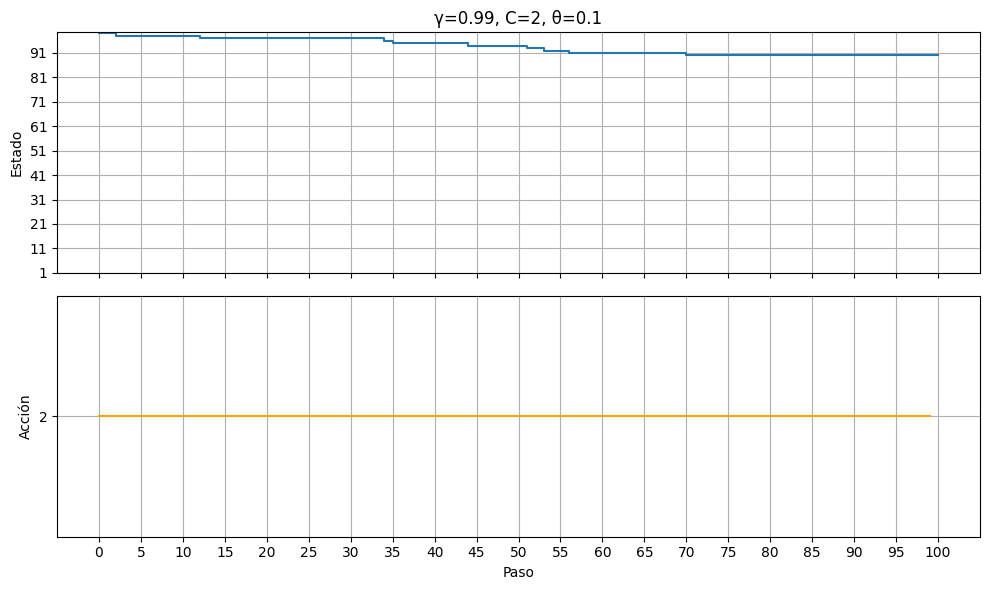

El costo acumulado es:  5.575757575757575


In [78]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [79]:
# el futuro importa mucho
gamma = 0.99
# el costo de reemplazar no es tan alto
C = 1
# degradacion lenta
theta = 0.1

In [80]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [81]:
V_ast_a, pi_ast_a

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.99674747, 0.97732446, 0.95630058,
        0.9351182 , 0.91392014, 0.89272052, 0.87152075, 0.85032096,
        0.82912117, 0.80792138, 0.78672159, 0.7655218 , 0.74432201,
        0.72312222, 0.70192243, 0.68072264, 0.65952285, 0.63832307,
        0.61712328, 0.59592349, 0.5747237 , 0.55

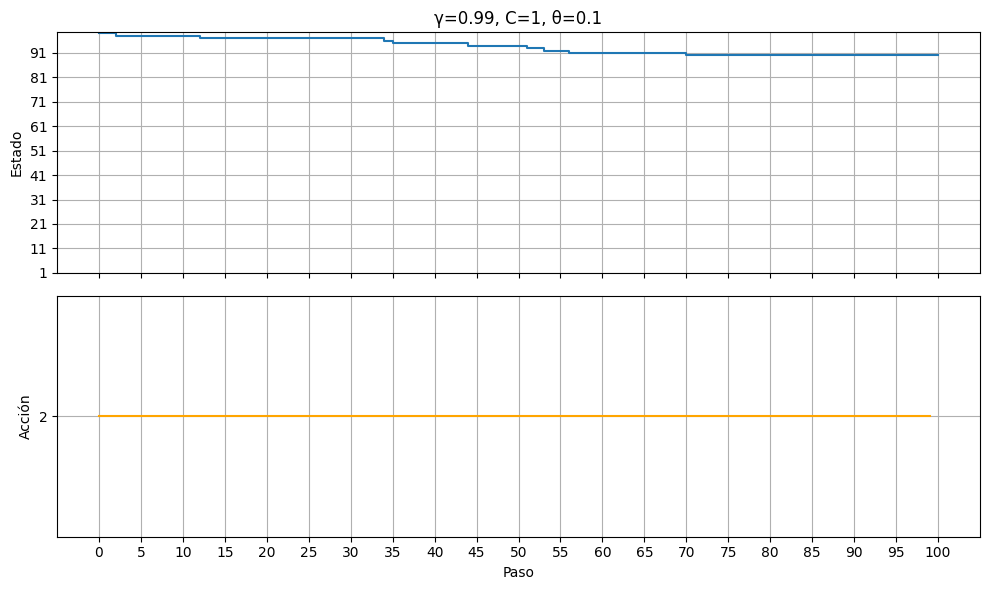

El costo acumulado es:  5.575757575757575


In [82]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

In [83]:
# el futuro importa mucho
gamma = 0.99
# el costo de reemplazar es bajo
C = 0.5
# degradacion lenta
theta = 0.1

In [84]:
V_ast_a, pi_ast_a = value_iteration(S,theta,C,gamma)

In [85]:
V_ast_a, pi_ast_a

(array([0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.5       , 0.5       , 0.5 

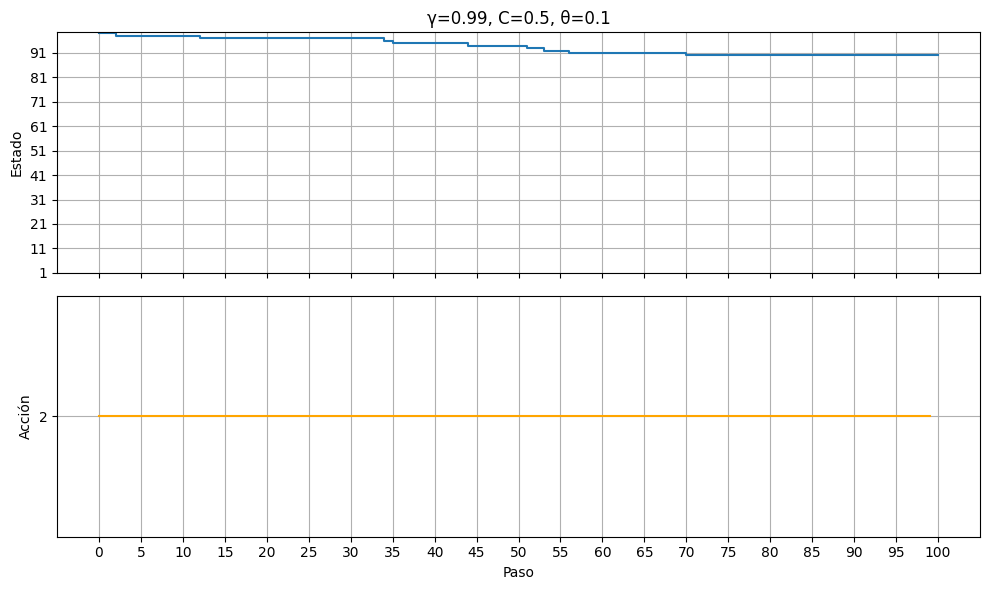

El costo acumulado es:  5.575757575757575


In [86]:
plot_trajectory(pi_ast_a, policy=f"γ={gamma}, C={C}, θ={theta}")

---

**Conclusiones:**

Cuando el futuro importa más (γ=0.99), se puede ver que incluso en el caso de alta probabilidad de desgaste (θ=0.9) y costo alto (C=2), el agente toma la decisión de reemplazar antes de llegar al peor estado. En 6a no pasaba esto, ahí se podía ver como la política óptima era no cambiar nunca.

Cuando el costo es bajo (C=0.5) y la degradación sigue siendo rápida (θ=0.9) se tiene un comportamiento similar a 6a en el caso análogo, pero se observa que la política óptima empieza a reemplazar en un estado menos roto que antes, dándole mayor importancia al futuro.

Cuando la degradación es lenta (θ=0.1) y sin importar el costo, ocurre que la política óptima es reemplazar en estados menos dañados con respecto a 6a, nuevamente porque el futuro es más importante por tener un γ mayor.

Cabe destacar que, darle importancia al futuro parece que hiciera que se obtengan costos acumulados más bajos, ya que el mínimo en 6b (17.3) es menor que en 6a (22.7).

---